In [1]:
import sklearn as skl
import pandas as pd
import os
import seaborn as sns
import numpy as np

#random seed
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=16)
mpl.rc('xtick', labelsize=14)
mpl.rc('ytick', labelsize=14)

## Data Loading, prepatration and train-test split

In [2]:
#load data
data_path = 'datasets/housing'


def load_data(path=data_path):
    csv_path = os.path.join(path,'housing.csv')
    return pd.read_csv(csv_path)

In [3]:
housing = load_data()
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
longitude             20640 non-null float64
latitude              20640 non-null float64
housing_median_age    20640 non-null float64
total_rooms           20640 non-null float64
total_bedrooms        20433 non-null float64
population            20640 non-null float64
households            20640 non-null float64
median_income         20640 non-null float64
median_house_value    20640 non-null float64
ocean_proximity       20640 non-null object
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [4]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


/home/mateo/anaconda3/envs/D_A/lib/python3.7/site-packages/numpy/lib/histograms.py:754: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/home/mateo/anaconda3/envs/D_A/lib/python3.7/site-packages/numpy/lib/histograms.py:755: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


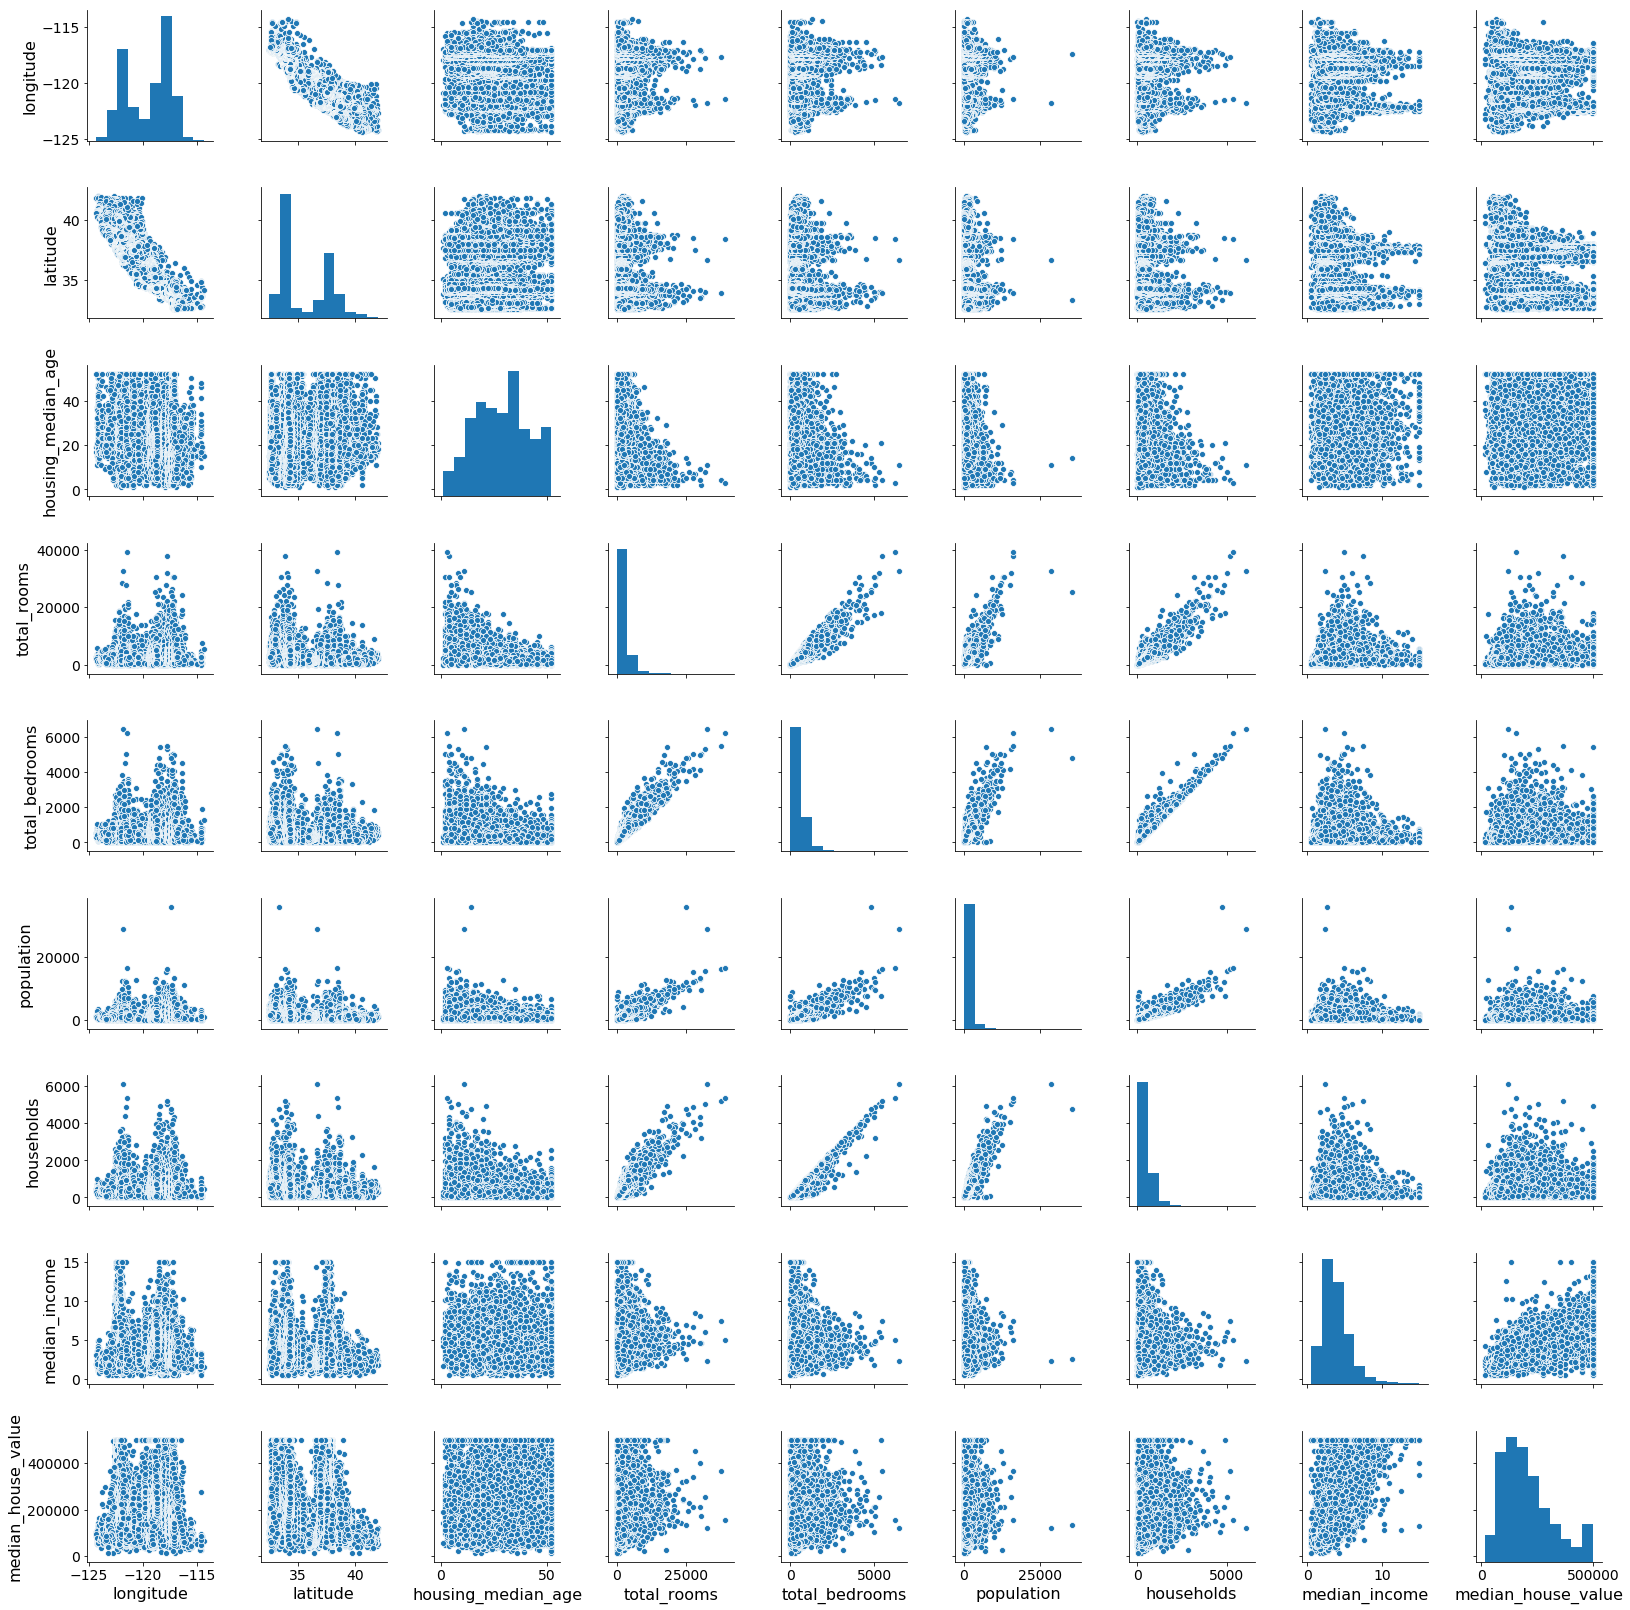

In [5]:
sns.pairplot(housing)
plt.show()

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
train_set, test_set = train_test_split(housing,test_size=0.2,random_state=42)

In [8]:
#rearanging the median income into 5 categories
housing["income_cat"] = pd.cut(housing["median_income"],
       bins=[0., 1.5, 3.0, 4.5, 6., np.inf],
       labels=[1, 2, 3, 4, 5])


split = skl.model_selection.StratifiedShuffleSplit(n_splits=1,test_size=0.2,random_state=42)
for train_index, test_index in split.split(housing,housing['income_cat']):
    strat_tain_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]

## Data exploration

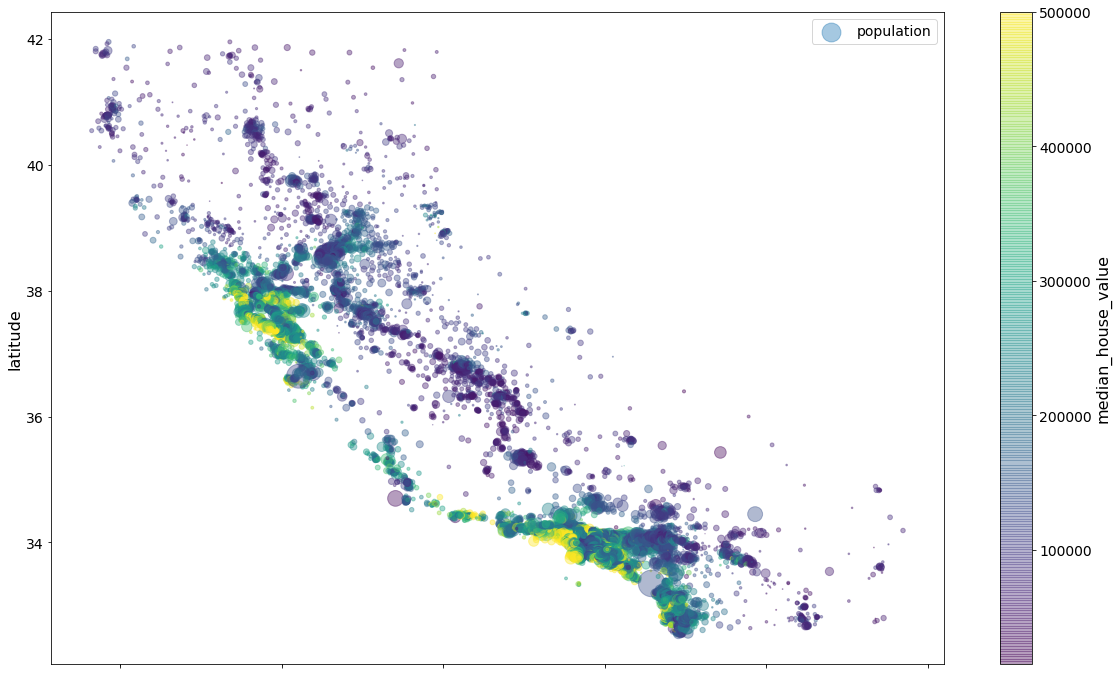

In [9]:
housing.plot(kind='scatter',x="longitude",y="latitude",alpha=0.4,s=housing["population"]/50,
            label="population", c='median_house_value', cmap=plt.get_cmap('viridis'),
            colorbar=True,figsize=(20,12))
plt.legend(fontsize=14)
plt.show()

## Correlations

In [10]:
corr_matrix = housing.corr()
print(corr_matrix)

                    longitude  latitude  housing_median_age  total_rooms  \
longitude            1.000000 -0.924664           -0.108197     0.044568   
latitude            -0.924664  1.000000            0.011173    -0.036100   
housing_median_age  -0.108197  0.011173            1.000000    -0.361262   
total_rooms          0.044568 -0.036100           -0.361262     1.000000   
total_bedrooms       0.069608 -0.066983           -0.320451     0.930380   
population           0.099773 -0.108785           -0.296244     0.857126   
households           0.055310 -0.071035           -0.302916     0.918484   
median_income       -0.015176 -0.079809           -0.119034     0.198050   
median_house_value  -0.045967 -0.144160            0.105623     0.134153   

                    total_bedrooms  population  households  median_income  \
longitude                 0.069608    0.099773    0.055310      -0.015176   
latitude                 -0.066983   -0.108785   -0.071035      -0.079809   
housing_

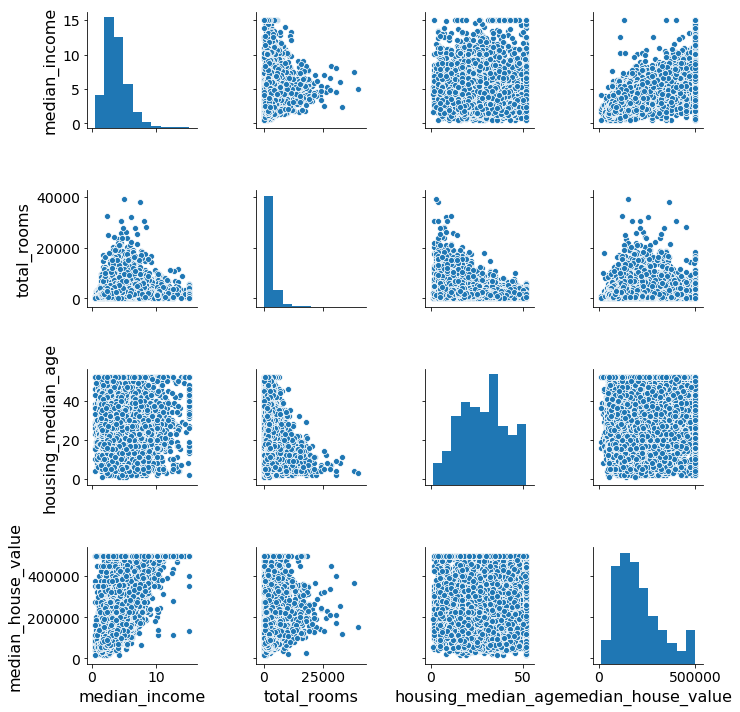

In [11]:
#Pair plot of relevant atributes fo analysis
atributes = ['median_income','total_rooms','housing_median_age', 'median_house_value']
sns.pairplot(housing[atributes],kind='scatter')

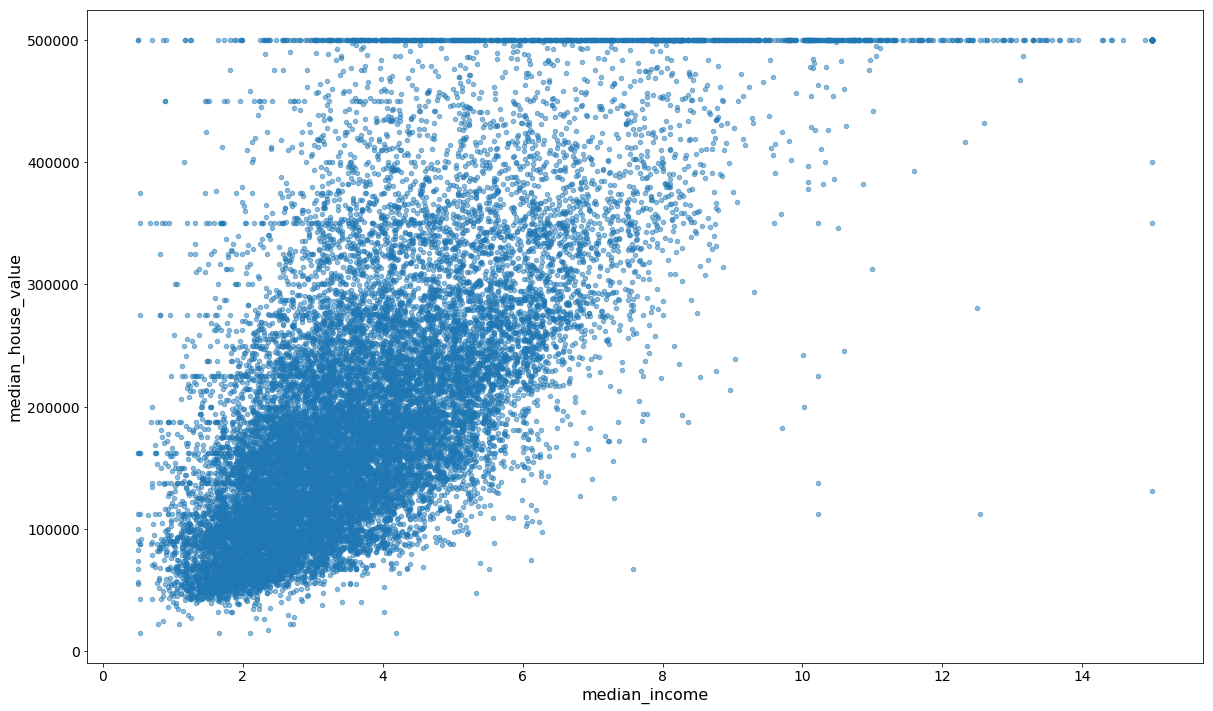

In [12]:
#median_income plot
housing.plot(kind='scatter',x='median_income',y='median_house_value',figsize=(20,12),alpha=0.5)

In [13]:
#creating some meaningful atributes
housing['rooms_per_household'] = housing['total_rooms']/housing['households']
housing['bedrooms_per_household'] = housing['total_bedrooms']/housing['total_rooms']
housing['population_per_household'] = housing['population']/housing['households']

In [14]:
corr_matrix['median_house_value'].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.688075
total_rooms           0.134153
housing_median_age    0.105623
households            0.065843
total_bedrooms        0.049686
population           -0.024650
longitude            -0.045967
latitude             -0.144160
Name: median_house_value, dtype: float64

In [15]:
#clean data
housing = strat_tain_set.drop('median_house_value',axis=1)
housing_labels = strat_tain_set['median_house_value'].copy()

## Handling missing values

In [16]:
#fill missing values with median value
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='median')

numerical_housing = housing.drop('ocean_proximity',axis=1)
imputer.fit(numerical_housing)
X = imputer.transform(numerical_housing)
housing_tr = pd.DataFrame(X,columns=numerical_housing.columns)

## Handling categorical attributes

In [17]:
from sklearn.preprocessing import LabelEncoder
#Encode categorical attributes
encoder = LabelEncoder()
categorical_housing = housing['ocean_proximity']
housing_cat_encoded = encoder.fit_transform(categorical_housing)

from sklearn.preprocessing import OneHotEncoder
#one-hot encode categorical attributes
encoder_1hot = OneHotEncoder()
housing_cat_1hot = encoder_1hot.fit_transform(housing_cat_encoded.reshape(-1,1))

/home/mateo/anaconda3/envs/D_A/lib/python3.7/site-packages/sklearn/preprocessing/_encoders.py:368: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


In [18]:
#Using label binarizer
from sklearn.preprocessing import LabelBinarizer
#Saving the result as a sparse array
encoder = LabelBinarizer(sparse_output=True)
housing_cat_1hot = encoder.fit_transform(categorical_housing)

## Custom transformers

In [19]:
from sklearn.base import BaseEstimator,TransformerMixin

#Add a custom transformer Scikit-lear style to addd somo new and perhaps important attributes
rooms_ix, bedrooms_ix,population_ix, household_ix = [list(housing.columns).index(col)
                               for col in ("total_rooms", "total_bedrooms", "population", "households")]

class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self, add_bedrooms_per_household = True): # no *args or **kwargs
        self.add_bedrooms_per_household = add_bedrooms_per_household
    def fit(self, X, y=None):
        return self  # nothing else to do
    def transform(self, X, y=None):
        rooms_per_household = X[:, rooms_ix] / X[:, household_ix]
        population_per_household = X[:, population_ix] / X[:, household_ix]
        if self.add_bedrooms_per_household:
            bedrooms_per_household = X[:, bedrooms_ix] / X[:, rooms_ix]
            return np.c_[X, rooms_per_household, population_per_household,
                         bedrooms_per_household]
        else:
            return np.c_[X, rooms_per_household, population_per_household]

attr_adder = CombinedAttributesAdder(add_bedrooms_per_household=False)
housing_extra_attribs = attr_adder.transform(housing.values)

## Feature scaling and pipelines

In [20]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

#A preprocessing and scaling pipeline for numerical attributes
numerical_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('attrib_adder', CombinedAttributesAdder()),
    ('standard_scaler',StandardScaler()),
])

housing_numerical_tr = numerical_pipeline.fit_transform(numerical_housing)

In [21]:
#Full pipeline for numerical and categorical data
from sklearn.compose import ColumnTransformer

num_attribs = list(numerical_housing)
cat_attribs = ["ocean_proximity"]

full_pipeline = ColumnTransformer([
        ("num", numerical_pipeline, num_attribs),
        ("cat", OneHotEncoder(), cat_attribs),
    ])

housing_prepared = full_pipeline.fit_transform(housing)

# ML models

### Linear regression model

In [22]:
#Linear Regression
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(housing_prepared,housing_labels)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [24]:
#compute the mean squared error of the regression
from sklearn.metrics import mean_squared_error

housing_predictions_linear = lin_reg.predict(housing_prepared)
regression_mse = mean_squared_error(housing_labels,housing_predictions_linear)
regression_rmse = np.sqrt(regression_mse)
print(regression_rmse)

68376.64295459937


### Decision tree regression

In [25]:
#Decision tree regressor
from sklearn.tree import DecisionTreeRegressor

tree_regression = DecisionTreeRegressor()
tree_regression.fit(housing_prepared,housing_labels)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [26]:
#compute the tree regression error
housing_predictions_tree = tree_regression.predict(housing_prepared)
tree_reg_mse = mean_squared_error(housing_labels,housing_predictions_tree)
tree_reg_rmse = np.sqrt(tree_reg_mse)
print(tree_reg_rmse)

0.0


### K-fold cross-validation

In [27]:
from sklearn.model_selection import cross_val_score

#tree regressor cross-validation
scores = cross_val_score(tree_regression,housing_prepared,
                        housing_labels, scoring='neg_mean_squared_error',
                        cv=10)
rmse_scores = np.sqrt(-scores)
print('scores: ', rmse_scores)
print('mean score: ', rmse_scores.mean())
print('Standard deviation: ', rmse_scores.std())

scores:  [69595.77288562 65892.49840035 68904.08708221 68631.79627553
 71158.28958246 75759.34692938 71756.17740938 69757.92410769
 77555.84660582 70320.51898092]
mean score:  70933.22582593601
Standard deviation:  3259.5535441625275


In [28]:
#linear regression cross validation
lin_scores = cross_val_score(lin_reg,housing_prepared,
                        housing_labels, scoring='neg_mean_squared_error',
                        cv=10)
lin_rmse_scores = np.sqrt(-lin_scores)
print('scores: ', lin_rmse_scores)
print('mean score: ', lin_rmse_scores.mean())
print('Standard deviation: ', lin_rmse_scores.std())

scores:  [66877.52325028 66608.120256   70575.91118868 74179.94799352
 67683.32205678 71103.16843468 64782.65896552 67711.29940352
 71080.40484136 67687.6384546 ]
mean score:  68828.99948449328
Standard deviation:  2662.7615706103443


### Random forest regression

In [29]:
#Random forest regressor
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor(n_estimators=10)
forest_reg.fit(housing_prepared, housing_labels)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [30]:
#Random forest model croos-validation
forest_scores = cross_val_score(forest_reg, housing_prepared,
                               housing_labels, scoring='neg_mean_squared_error',
                               cv=10)
forest_rmse_scores = np.sqrt(-forest_scores)
print('scores: ', forest_rmse_scores)
print('mean score: ', forest_rmse_scores.mean())
print('Standard deviation: ', forest_rmse_scores.std())

scores:  [51989.42163894 50256.58477885 51960.72528613 54603.03472521
 52556.67468339 55524.91716583 53330.99671725 50682.82166352
 55640.42287527 53222.65971222]
mean score:  52976.82592466151
Standard deviation:  1768.1647601728305


### Support vector regression

In [31]:
#Support vector regression
from sklearn.svm import SVR

svm_reg = SVR(kernel="linear")
svm_reg.fit(housing_prepared, housing_labels)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
  gamma='auto_deprecated', kernel='linear', max_iter=-1, shrinking=True,
  tol=0.001, verbose=False)

In [32]:
#SVR model cross-validation
svr_scores = cross_val_score(svm_reg, housing_prepared,
                               housing_labels, scoring='neg_mean_squared_error',
                               cv=10)
svr_rmse_scores = np.sqrt(-svr_scores)
print('scores: ', svr_rmse_scores)
print('mean score: ', svr_rmse_scores.mean())
print('Standard deviation: ', svr_rmse_scores.std())

scores:  [101753.54978461 108380.51380685 106200.32161595 109301.66402916
 106682.29073341 111849.88610827 106534.44353941 110576.7797446
 109867.22584371 107754.78897031]
mean score:  107890.14641762718
Standard deviation:  2699.402075191871


## Grid Search

In [57]:
from sklearn.model_selection import GridSearchCV

#Random forest regression grid search
params_grid = [{'n_estimators':[100,120],'max_features':[2,4,6,8]},
               {'bootstrap':[False], 'n_estimators':[100,120],'max_features':[2,4,6]}]

forest_reg = RandomForestRegressor()
grid_search = GridSearchCV(forest_reg, params_grid, cv=5,
                           scoring='neg_mean_squared_error', n_jobs=4)
grid_search.fit(housing_prepared,housing_labels)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=4,
       param_grid=[{'n_estimators': [100, 120], 'max_features': [2, 4, 6, 8]}, {'bootstrap': [False], 'n_estimators': [100, 120], 'max_features': [2, 4, 6]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='neg_mean_squared_error', verbose=0)

In [58]:
#Grid search best parameters
grid_search.best_params_

{'bootstrap': False, 'max_features': 6, 'n_estimators': 120}

In [59]:
#Grid search best model
grid_search.best_estimator_

RandomForestRegressor(bootstrap=False, criterion='mse', max_depth=None,
           max_features=6, max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=120, n_jobs=None, oob_score=False,
           random_state=None, verbose=0, warm_start=False)

In [60]:
#Grid serach Scores
cvres = grid_search.cv_results_

for ms, param in zip(cvres['mean_test_score'],cvres['params']):
    print(np.sqrt(-ms),param)

52533.07530475642 {'max_features': 2, 'n_estimators': 100}
52305.98568289569 {'max_features': 2, 'n_estimators': 120}
50590.66648723118 {'max_features': 4, 'n_estimators': 100}
50623.67807098016 {'max_features': 4, 'n_estimators': 120}
50229.40000809403 {'max_features': 6, 'n_estimators': 100}
50051.26163058122 {'max_features': 6, 'n_estimators': 120}
50096.93640126107 {'max_features': 8, 'n_estimators': 100}
49977.42334508545 {'max_features': 8, 'n_estimators': 120}
51500.55186576714 {'bootstrap': False, 'max_features': 2, 'n_estimators': 100}
51462.47844406426 {'bootstrap': False, 'max_features': 2, 'n_estimators': 120}
49691.8969008678 {'bootstrap': False, 'max_features': 4, 'n_estimators': 100}
49840.37260075134 {'bootstrap': False, 'max_features': 4, 'n_estimators': 120}
49486.424692865934 {'bootstrap': False, 'max_features': 6, 'n_estimators': 100}
49358.38900647034 {'bootstrap': False, 'max_features': 6, 'n_estimators': 120}


## Coment

The search results suggets the best model is the random forest regression with bootstarp=False, max_features=6 and n_estimators=120.

## Feature importance in the random forest regression model

In [61]:
feature_importance = grid_search.best_estimator_.feature_importances_
print(feature_importance)

[7.10114506e-02 6.61446370e-02 4.42713381e-02 1.73142235e-02
 1.73301437e-02 1.71567250e-02 1.65106290e-02 2.54450299e-01
 1.49647166e-01 4.31307393e-02 1.04132204e-01 5.59578987e-02
 8.97579319e-03 1.26588787e-01 9.42009639e-05 2.87690878e-03
 4.40685533e-03]


In [62]:
extra_attribute = ['rooms_per_hhold','pop_per_hhold','bedrooms_per_hhold']
cat_1hot_atribs = list(encoder.classes_)
attributes = num_attribs + extra_attribute + cat_1hot_atribs
sorted(zip(feature_importance,attributes),reverse=True)

[(0.2544502992706854, 'median_income'),
 (0.14964716597830524, 'income_cat'),
 (0.12658878732051304, 'INLAND'),
 (0.10413220427144873, 'pop_per_hhold'),
 (0.07101145058204882, 'longitude'),
 (0.06614463702041243, 'latitude'),
 (0.055957898735006464, 'bedrooms_per_hhold'),
 (0.04427133805601428, 'housing_median_age'),
 (0.043130739296056556, 'rooms_per_hhold'),
 (0.017330143708255964, 'total_bedrooms'),
 (0.017314223467602547, 'total_rooms'),
 (0.01715672504489251, 'population'),
 (0.016510628989224514, 'households'),
 (0.00897579319216801, '<1H OCEAN'),
 (0.0044068553254983985, 'NEAR OCEAN'),
 (0.002876908777994984, 'NEAR BAY'),
 (9.420096387210705e-05, 'ISLAND')]

## Model evaluation

In [63]:
#choose the final model as the best estimator for the grid-search
final_model = grid_search.best_estimator_

#creating the test set and the labels
X_test = strat_test_set.drop('median_house_value', axis=1)
y_test = strat_test_set['median_house_value'].copy()

#Processing the test set through the pipeline
X_test_prepared = full_pipeline.transform(X_test)

#fitting the test set with the model
final_predictions = final_model.predict(X_test_prepared)

#error of the model
final_mse = mean_squared_error(y_test,final_predictions)
print('root mean squared error of the final model: ', np.sqrt(final_mse))


root mean squared error of the final model:  66231.25130459736


## Support vector regression

In [71]:
#Support vector regression
from sklearn.svm import SVR

svm_reg = SVR()
params_grid_svr = [{'kernel':['linear'], 'C':[10., 50., 100., 500., 1000., 5000., 10000., 50000.]},
              {'kernel':['rbf'],'C':[10., 50., 100., 500., 1000., 5000., 10000., 50000.], 
               'gamma': [0.01, 0.03, 0.1, 0.3, 1.0, 3.0]}]
grid_search_svr = GridSearchCV(svm_reg,param_grid=params_grid_svr, cv=5, 
                               n_jobs=4, verbose=2, scoring='neg_mean_squared_error')
grid_search_svr.fit(housing_prepared,housing_labels)

Fitting 5 folds for each of 56 candidates, totalling 280 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  33 tasks      | elapsed:  3.3min
[Parallel(n_jobs=4)]: Done 154 tasks      | elapsed: 20.0min
[Parallel(n_jobs=4)]: Done 280 out of 280 | elapsed: 39.0min finished


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
  gamma='auto_deprecated', kernel='rbf', max_iter=-1, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid='warn', n_jobs=4,
       param_grid=[{'kernel': ['linear'], 'C': [10.0, 50.0, 100.0, 500.0, 1000.0, 5000.0, 10000.0, 50000.0]}, {'kernel': ['rbf'], 'C': [10.0, 50.0, 100.0, 500.0, 1000.0, 5000.0, 10000.0, 50000.0], 'gamma': [0.01, 0.03, 0.1, 0.3, 1.0, 3.0]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='neg_mean_squared_error', verbose=2)

In [74]:
neg_mse = grid_search_svr.best_score_
-neg_mse

3214675406.5717115

In [75]:
grid_search_svr.best_params_

{'C': 50000.0, 'gamma': 0.3, 'kernel': 'rbf'}

In [77]:
mse_svr = grid_search_svr.best_score_
rmse_svr = np.sqrt(-mse_svr)
print('Root mean squared error of the support vector regreesion: ', rmse_svr)

Root mean squared error of the support vector regreesion:  56698.10761014614
